# EDA df histórico precios al consumidor

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Cargamos el parquet
df = pd.read_parquet('processed/processed_precios.parquet')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6656149 entries, 0 to 6656148
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   mes                      int64         
 1   semana                   int64         
 2   fecha_inicio             datetime64[ns]
 3   fecha_termino            datetime64[ns]
 4   id_region                int64         
 5   region                   category      
 6   sector                   object        
 7   tipo_de_punto_monitoreo  category      
 8   grupo                    category      
 9   producto                 object        
 10  variedad                 object        
 11  calidad                  category      
 12  unidad                   object        
 13  precio_minimo            float64       
 14  precio_maximo            float64       
 15  precio_promedio          float64       
 16  anyo                     int16         
dtypes: category(4), datetime64[

In [5]:
df.isnull().sum()

mes                              0
semana                           0
fecha_inicio                325890
fecha_termino               325890
id_region                        0
region                           0
sector                           0
tipo_de_punto_monitoreo          0
grupo                            0
producto                         0
variedad                   5347059
calidad                    5347059
unidad                           0
precio_minimo              6649779
precio_maximo              6649779
precio_promedio                  0
anyo                             0
dtype: int64

4 columnas se ven muy afectadas con nulos, por lo que no se van a utilizar para análisis

In [6]:
df.describe(include='all')

,mes,semana,fecha_inicio,fecha_termino,id_region,region,sector,tipo_de_punto_monitoreo,grupo,producto,variedad,calidad,unidad,precio_minimo,precio_maximo,precio_promedio,anyo
count,6.656149e+06,6.656149e+06,6330259,6330259,6.656149e+06,6656149,6656149,6656149,6656149,6656149,1309090,1309090,6656149,6370.000000,6370.000000,6.656149e+06,6.656149e+06
unique,NaN,NaN,NaN,NaN,NaN,9,47,7,7,158,117,14,21,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Región Metropolitana de Santiago,Oriente,Supermercado,Abarrotes y otros,Mantequilla con sal,Sin especificar,Primera,$/kilo,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2839343,593964,4318990,1741650,230174,385263,766476,4240392,NaN,NaN,NaN,NaN
mean,6.727640e+00,2.758552e+01,2022-10-11 02:04:44.909291520,2022-10-15 02:04:44.909291008,1.046887e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.259969,406.910204,4.274455e+03,2.021901e+03
min,1.000000e+00,1.000000e+00,2019-12-30 00:00:00,2020-01-03 00:00:00,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000e+00,2.008000e+03
25%,4.000000e+00,1.500000e+01,2022-01-17 00:00:00,2022-01-21 00:00:00,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.400000e+03,2.020000e+03
50%,7.000000e+00,2.900000e+01,2023-02-13 00:00:00,2023-02-17 00:00:00,1.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,250.000000,2.610000e+03,2.023000e+03
75%,9.000000e+00,4.000000e+01,2023-11-06 00:00:00,2023-11-10 00:00:00,1.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,700.000000,6.698000e+03,2.023000e+03
max,1.200000e+01,5.300000e+01,2024-11-04 00:00:00,2024-11-08 00:00:00,1.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.000000,3000.000000,1.415556e+05,2.024000e+03


In [7]:
df.tail()

,mes,semana,fecha_inicio,fecha_termino,id_region,region,sector,tipo_de_punto_monitoreo,grupo,producto,variedad,calidad,unidad,precio_minimo,precio_maximo,precio_promedio,anyo
6656144,11,45,2024-11-04,2024-11-08,16,Región de Ñuble,Punilla,Supermercado,Pan,Marraqueta,None,NaN,$/kilo,NaN,NaN,1990.0,2024
6656145,11,45,2024-11-04,2024-11-08,16,Región de Ñuble,Punilla,Supermercado,Pan,Marraqueta,None,NaN,$/kilo,NaN,NaN,2190.0,2024
6656146,11,45,2024-11-04,2024-11-08,16,Región de Ñuble,Punilla,Supermercado,Pan,Marraqueta,None,NaN,$/kilo,NaN,NaN,2190.0,2024
6656147,11,45,2024-11-04,2024-11-08,16,Región de Ñuble,Punilla,Supermercado,Pan,Pan amasado,None,NaN,$/kilo,NaN,NaN,2890.0,2024
6656148,11,45,2024-11-04,2024-11-08,16,Región de Ñuble,Punilla,Supermercado,Pan,Pan amasado,None,NaN,$/kilo,NaN,NaN,2990.0,2024


In [8]:
# Sacamos el top 10 de valores de cada columna:
for col in df.columns:
    print(f"Top 10 valores columna: {col}")
    print(df[col].value_counts().head(10))

Top 10 valores columna: mes
mes
7     855849
8     719611
1     613802
9     570448
6     567243
12    560616
10    548937
11    519322
5     483691
3     458878
Name: count, dtype: int64
Top 10 valores columna: semana
semana
28    251465
34    190797
30    185137
29    172592
49    172122
27    160171
31    159603
35    159304
36    159175
32    157979
Name: count, dtype: int64
Top 10 valores columna: fecha_inicio
fecha_inicio
2023-07-10    123631
2023-12-04     91215
2023-03-06     72455
2023-06-05     69985
2022-07-25     69566
2023-08-21     66770
2023-07-17     64534
2022-10-31     63343
2023-09-04     61195
2020-08-31     59999
Name: count, dtype: int64
Top 10 valores columna: fecha_termino
fecha_termino
2023-07-14    123631
2023-12-08     91215
2023-03-10     72455
2023-06-09     69985
2022-07-29     69566
2023-08-25     66770
2023-07-21     64534
2022-11-04     63343
2023-09-08     61195
2020-09-04     59999
Name: count, dtype: int64
Top 10 valores columna: id_region
id_region


In [9]:
df.columns

Index(['mes', 'semana', 'fecha_inicio', 'fecha_termino', 'id_region', 'region',
       'sector', 'tipo_de_punto_monitoreo', 'grupo', 'producto', 'variedad',
       'calidad', 'unidad', 'precio_minimo', 'precio_maximo',
       'precio_promedio', 'anyo'],
      dtype='object')

In [10]:
df[["grupo","producto"]].value_counts().head(20)

grupo                          producto                     
Lácteos - Huevos - Margarinas  Mantequilla con sal              230174
                               Queso Mantecoso                  175114
Abarrotes y otros              Arroz grano ancho grado 1        144272
                               Spaghetti N°5                    141095
Lácteos - Huevos - Margarinas  Leche Fluida Descremada          140838
                               Leche Fluida Entera              139936
Abarrotes y otros              Harina sin polvos de hornear     131055
                               Garbanzos sin piel               123329
                               Harina con polvos de hornear     121982
Lácteos - Huevos - Margarinas  Margarina                        120694
Abarrotes y otros              Arroz grano ancho grado 2        109282
Lácteos - Huevos - Margarinas  Huevo blanco grande (primera)    106748
                               Yoghurt (vainilla ó frutilla)    105801
Abarrotes y otro

In [11]:
df.query("producto == 'Mantequilla con sal' and anyo == 2013")

,mes,semana,fecha_inicio,fecha_termino,id_region,region,sector,tipo_de_punto_monitoreo,grupo,producto,variedad,calidad,unidad,precio_minimo,precio_maximo,precio_promedio,anyo
74269,1,1,NaT,NaT,13,Región Metropolitana de Santiago,Centro,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1083.00,2013
74270,1,1,NaT,NaT,13,Región Metropolitana de Santiago,Centro,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1196.00,2013
74271,1,1,NaT,NaT,13,Región Metropolitana de Santiago,Centro,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,956.00,2013
74359,1,1,NaT,NaT,13,Región Metropolitana de Santiago,Norte,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1219.00,2013
74360,1,1,NaT,NaT,13,Región Metropolitana de Santiago,Norte,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1139.00,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105321,7,31,NaT,NaT,13,Región Metropolitana de Santiago,Norte,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1122.63,2013
105511,7,31,NaT,NaT,13,Región Metropolitana de Santiago,Oriente,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1139.45,2013
105696,7,31,NaT,NaT,13,Región Metropolitana de Santiago,Poniente,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1141.54,2013
105898,7,31,NaT,NaT,13,Región Metropolitana de Santiago,Sur,Supermercado,Lácteos - Huevos - Margarinas,Mantequilla con sal,,,$/pan de 250 gramos,NaN,NaN,1132.56,2013


In [12]:
df_precios = df.groupby(["producto", "unidad", "mes", "anyo"])["precio_promedio"].mean().reset_index()

In [13]:
df_precios.to_parquet('processed/grouped_precios.parquet', index=False)

In [14]:
df_precios.columns

Index(['producto', 'unidad', 'mes', 'anyo', 'precio_promedio'], dtype='object')

In [19]:
# buscamos duplicates sin incluir la columna precio_promedio
duplicates = df_precios[df_precios.duplicated(subset=["producto", "unidad", "mes", "anyo"], keep=False)]
duplicates.sort_values(by=["producto", "unidad", "mes", "anyo"], inplace=True)

/tmp/ipykernel_28588/572033549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.sort_values(by=["producto", "unidad", "mes", "anyo"], inplace=True)


In [22]:
df_precios.query("producto == 'Palta'").unidad.value_counts()

unidad
$/kilo    117
Name: count, dtype: int64

In [27]:
# creamos columna fecha usando columnas mes y anyo
df_precios["fecha"] = pd.to_datetime(df_precios["anyo"].astype(str) + "-" + df_precios["mes"].astype(str) + "-01")

<Axes: title={'center': 'Palta'}, xlabel='fecha'>

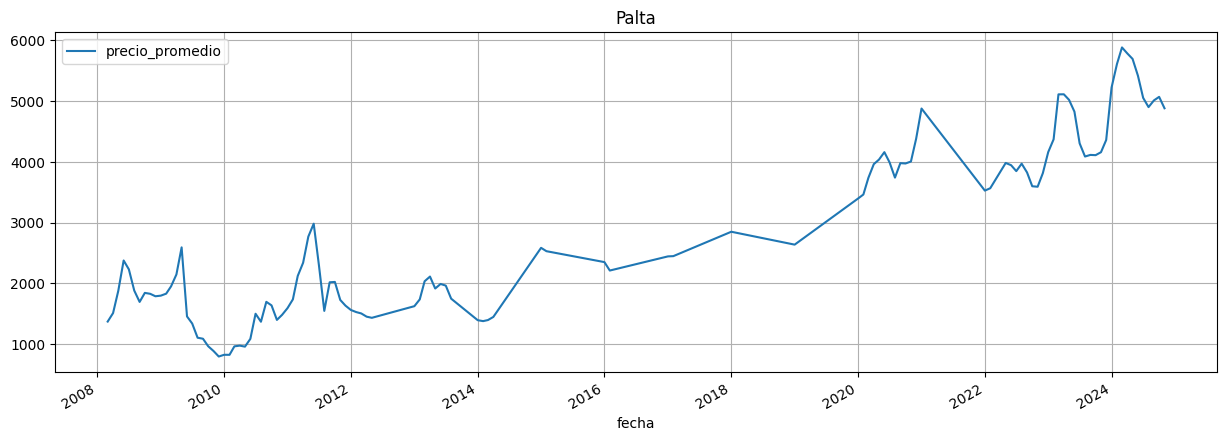

In [28]:
df_precios.sort_values(by=["producto", "unidad", "fecha"]).query("producto == 'Palta'").plot(x="fecha", y="precio_promedio", kind="line", title="Palta", figsize=(15, 5), grid=True)